In [1]:
import os
import numpy as np
from numpy import  mat
from numpy import *

In [2]:
os.chdir('/Users/luokui/Documents/机器学习实战/机器学习实战及配套代码/machinelearninginaction/Ch13/')

In [120]:
with open('iris.data.txt','r') as f:
    data = []
    for i in f.readlines():
        line = [j.strip() for j in i.split(',')[:4]]
        try:
            temp = [float(i) for i in line]
        except:     # nice 利用异常机制 捕获这种错误。
            print(line)
            continue
        data.append(temp)
#data[:4]

['']


In [58]:
dm = np.mean(data,axis=0)
nd = data-dm
cov = 1/len(nd) * np.matmul(nd.T,nd)  # 构造协方差矩阵 
## covMat = np.cov(meanRemoved, rowvar=0) #直接构建协方差矩阵。
cov

array([[ 0.68112222, -0.03900667,  1.26519111,  0.51345778],
       [-0.03900667,  0.18675067, -0.319568  , -0.11719467],
       [ 1.26519111, -0.319568  ,  3.09242489,  1.28774489],
       [ 0.51345778, -0.11719467,  1.28774489,  0.57853156]])

In [11]:
from numpy import linalg
eigVals,eigVects = linalg.eig(cov)
eigVals,eigVects

eigVects[:,:2]

(array([4.19667516, 0.24062861, 0.07800042, 0.02352514]),
 array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
        [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
        [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
        [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]]))

In [50]:
# pnd 为取前两个主成分的数据
pnd = np.matmul(nd,eigVects[:,:2])
#pnd+dm - data
pnd = np.asarray(pnd)

# 数据重构
recondata = np.matmul(pnd, eigVects[:,:2].T) + dm
recondata.shape

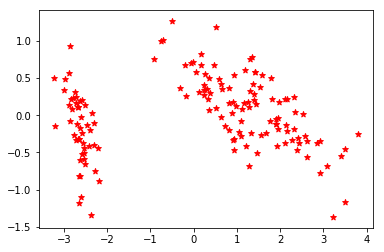

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(pnd[:,0],cpnd[:,1],ccolor='r', marker='*')

In [104]:
from numpy import *
def pca(dataMat, topNfeat=9999999):
    meanVals = mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals 
    covMat = cov(meanRemoved, rowvar=0)
    eigVals,eigVects = linalg.eig(mat(covMat))
    eigValInd = argsort(eigVals)            #sort, sort goes smallest to largest
    eigValInd = eigValInd[:-(topNfeat+1):-1]  #cut off unwanted dimensions
    redEigVects = eigVects[:,eigValInd]       #reorganize eig vects largest to smallest
    lowDDataMat = meanRemoved * redEigVects#transform data into new dimensions
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat, reconMat
lowd,rm = pca(datamat,topNfeat=2)

In [78]:
# with open('testSet3.txt','r') as f:
#    for line in f.readlines():
#        print(line)
len(lines)

150

In [ ]:
def replaceNanWithMean(): 
    datMat = loadDataSet('secom.data', ' ')
    numFeat = shape(datMat)[1]
    for i in range(numFeat):
        meanVal = mean(datMat[nonzero(~isnan(datMat[:,i].A))[0],i]) #values that are not NaN (a number)
        datMat[nonzero(isnan(datMat[:,i].A))[0],i] = meanVal  #set NaN values to mean
    return datMat